In [26]:
filename = 'nohup.out1e6'
import ast
file = open(filename,'r')
train_list, eval_list = [], []
for line in file.readlines():
    if line[0] == '{':
        d = ast.literal_eval(line)
        if 'loss' in d.keys():
            train_list.append(d)
        elif 'eval_loss' in d.keys():
            eval_list.append(d)




In [27]:
import numpy as np
n_train = len(train_list)
n_eval = len(eval_list)
eval_pcl_f1, eval_epoch, eval_loss = np.zeros(n_eval), np.zeros(n_eval), np.zeros(n_eval)
train_loss, train_epoch = np.zeros(n_train), np.zeros(n_train)


In [28]:
for i, d in enumerate(train_list):
    train_loss[i] = d['loss']
    train_epoch[i] = d['epoch']

for i, d in enumerate(eval_list):
    eval_pcl_f1[i] = d['eval_pcl_f1']
    eval_epoch[i] = d['epoch']
    eval_loss[i] = d['eval_loss']

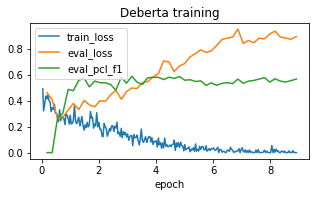

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5))
plt.plot(train_epoch, train_loss, label = 'train_loss')
plt.plot(eval_epoch, eval_loss, label = 'eval_loss')
plt.plot(eval_epoch, eval_pcl_f1, label = 'eval_pcl_f1' )
plt.xlabel('epoch')
plt.title('Deberta training')
plt.legend(loc ='best')
plt.show()